# Übung 6: Kantendetektion und Hough Transformation

##  Kantendetektion mit Canny

Mit dem Canny Detektor können Kanten in einem Bild detektiert werden. Das von Canny bereits 1987 etnwickelte Verfahren betrachtet die Kantenerkennung als Optimisierungsproblem und besteht in der Anwendung im wesentlichen aus 3 Schritten:

- Ermittlung der Kantenstärke durch Ableitungsfilter
- Finden des lokalen Maxima senkrecht zur Kante
- Hysteresis Thresholding mit 2 Schwellwerten unter Berücksichtigung der Verbindungen zwischen den Pixeln


In [3]:
# OpenCV needs to be included first
import cv2
import numpy as np

# for displaying images in jupyter

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.dpi']= 500


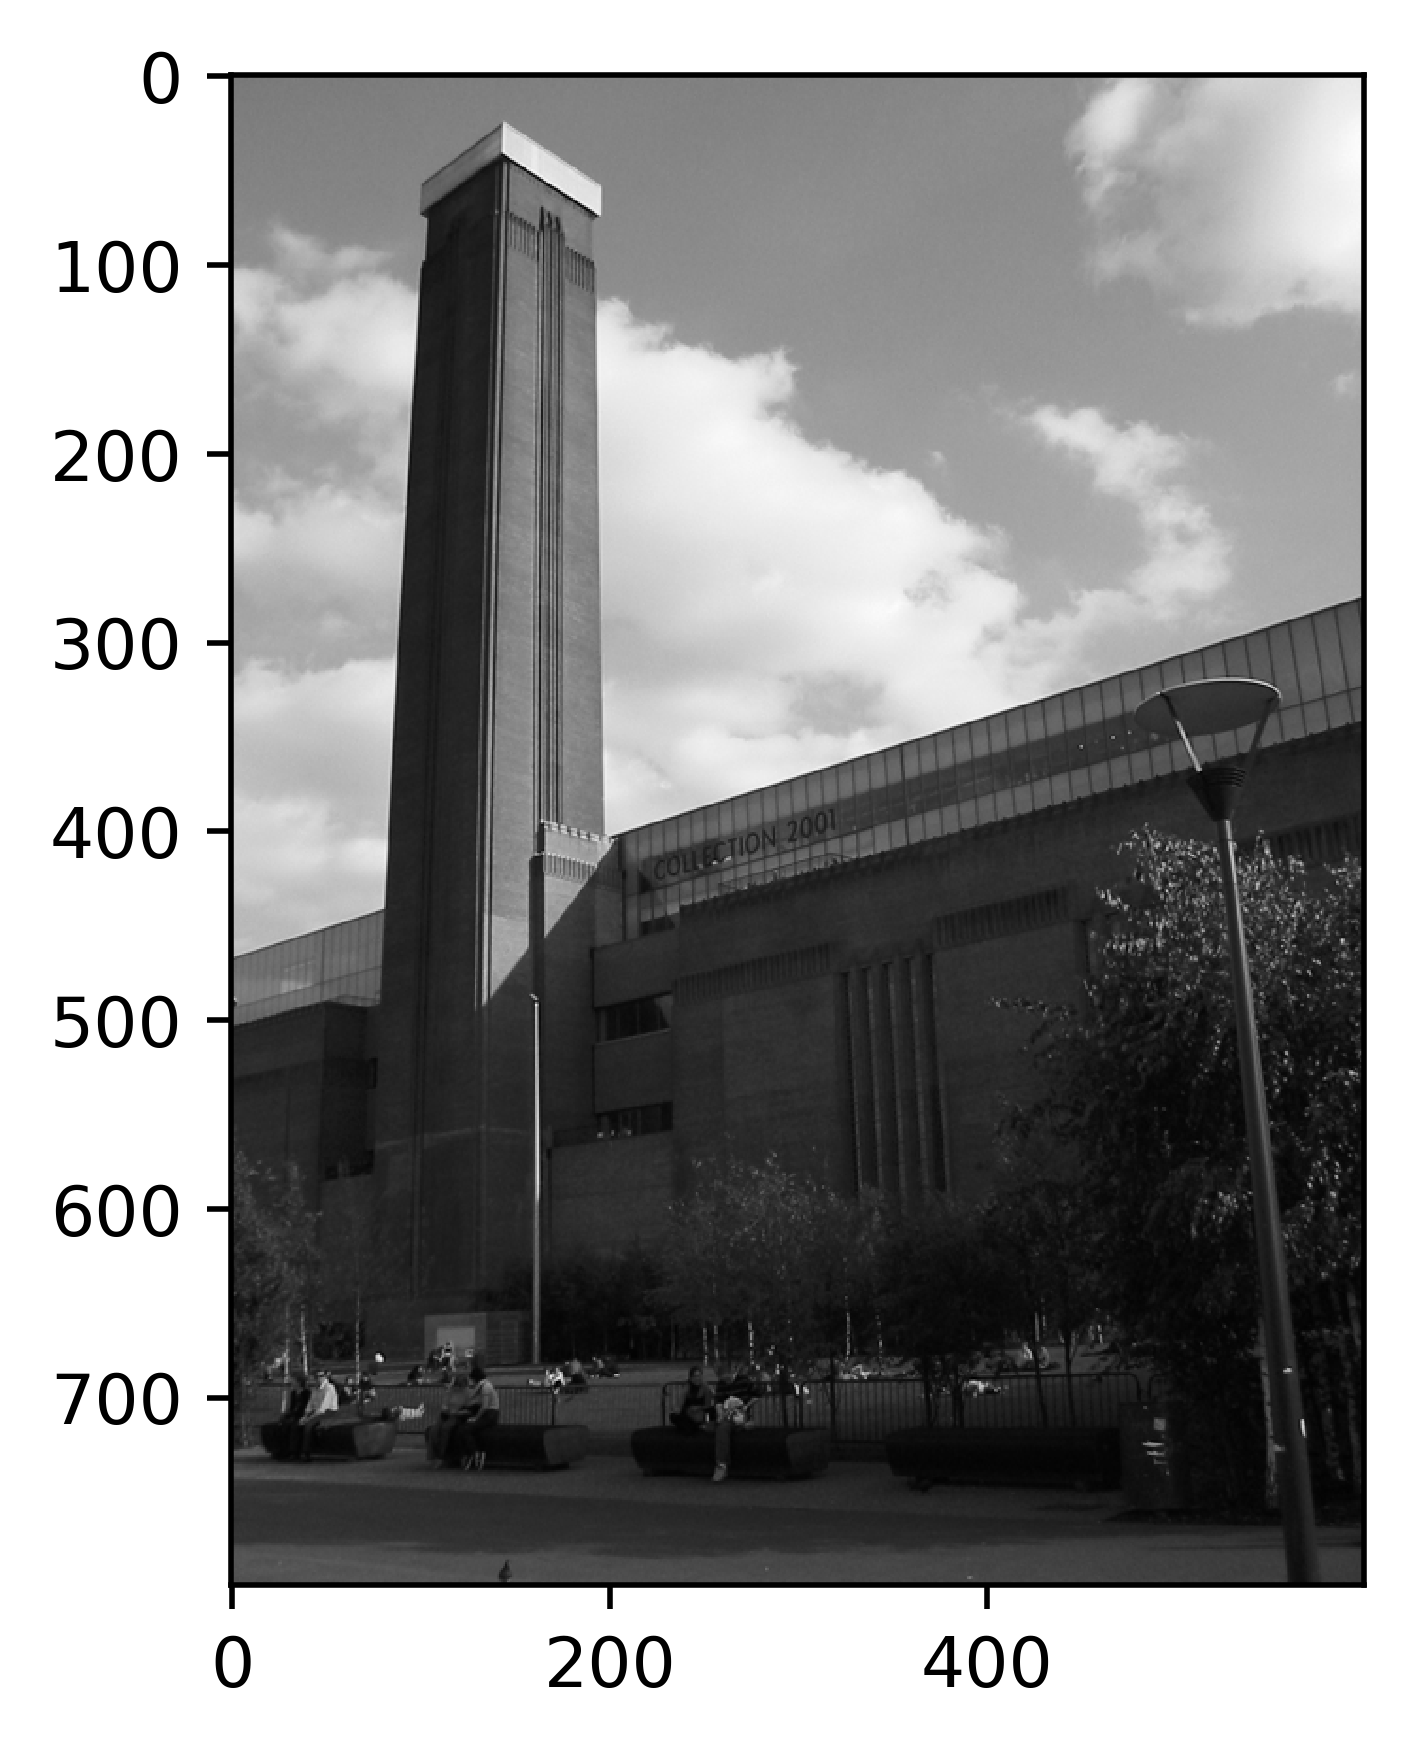

In [39]:
img  = cv2.imread('images/londonSmall.png')
plt.imshow(image)

### Aufgabe 1: Kantendetektion
Detektieren Sie auf obigen Bild die Kanten mit dem in OpenCV eingebauten Canny Detektor. Wir wirken sich die Parameter aus?

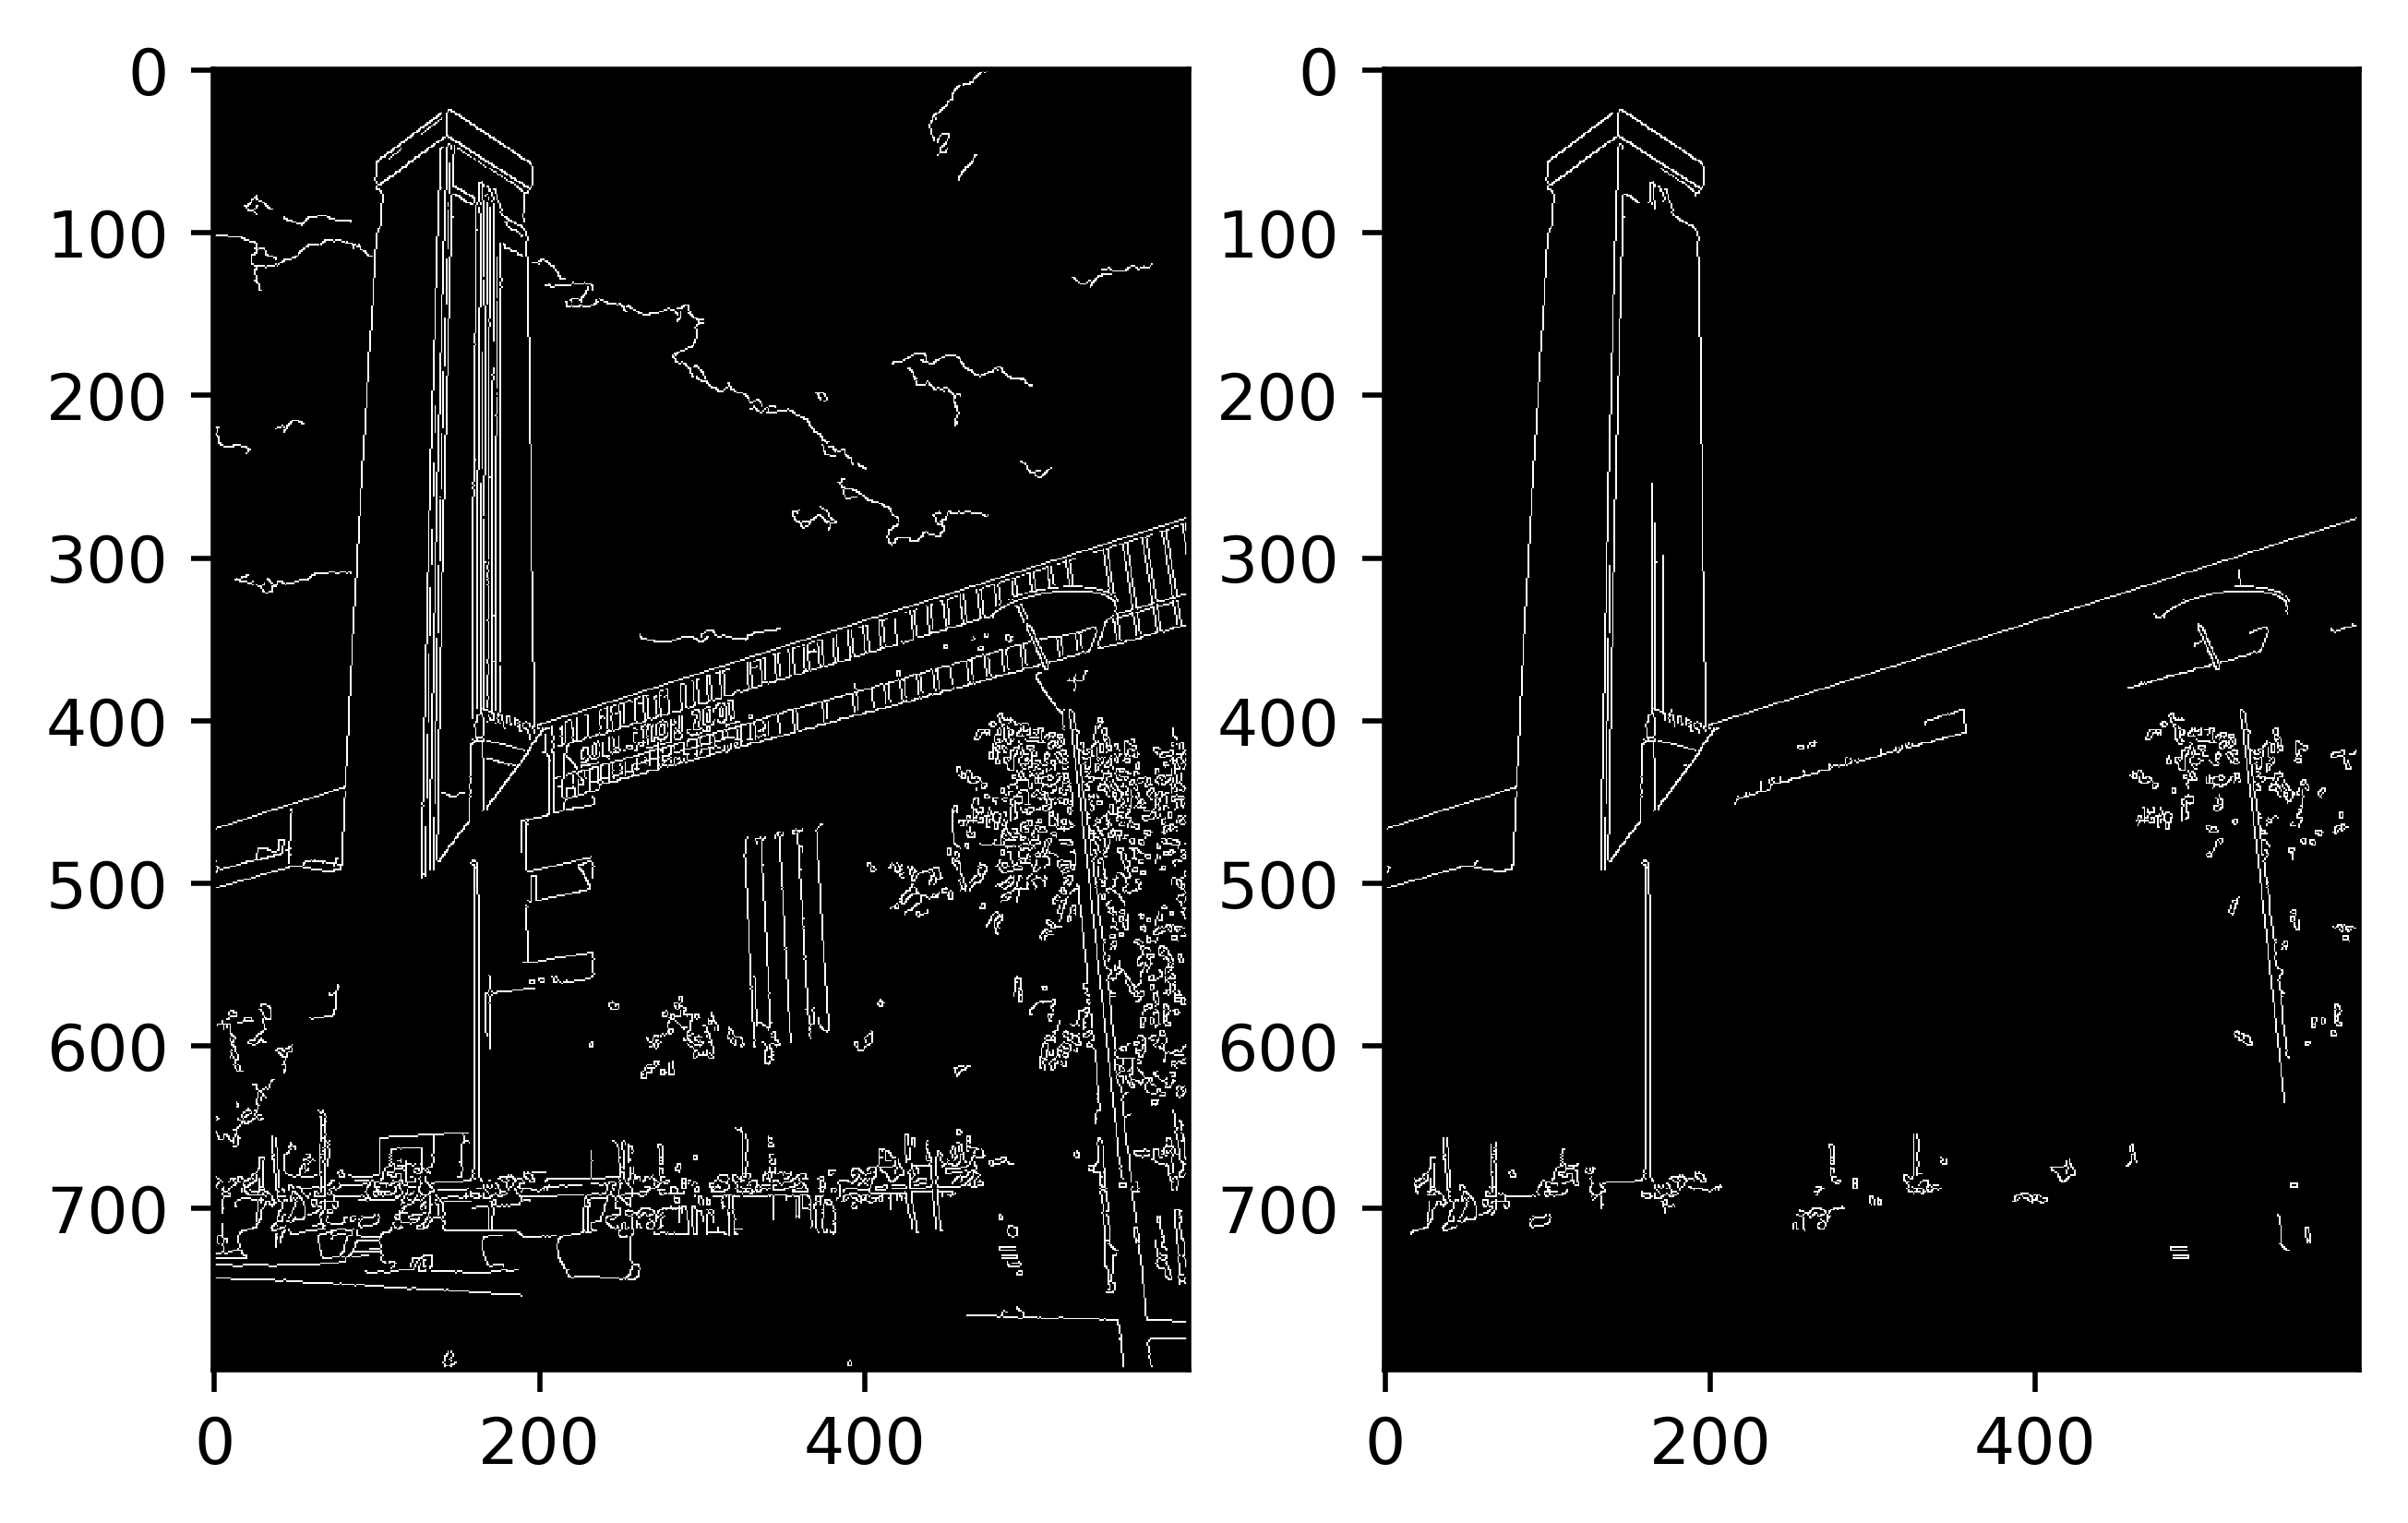

In [124]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray_blurred = cv2.GaussianBlur(img_gray, (3, 3), 0)

#canny

#Hysteresis: The final step. Canny does use two thresholds (upper and lower):

#If a pixel gradient is higher than the upper threshold, the pixel is accepted as an edge
#If a pixel gradient value is below the lower threshold, then it is rejected.
#If the pixel gradient is between the two thresholds,
#then it will be accepted only if it is connected to a pixel that is above the upper threshold.
#Canny recommended a upper:lower ratio between 2:1 and 3:1.

canny1 = cv2.Canny(img_gray_blurred, 30, 90)
canny2 = cv2.Canny(img_gray_blurred, 91, 255)
#upper und lower threshold definieren die Anzahl der Kanten, welche von Canny detektiert werden.

plt.subplot(1, 2, 1)
plt.imshow(canny1, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(canny2, cmap='gray')
plt.show()

### Aufgabe2:  Canny Filter auf verschiedenen Auflösungsstufen

Der in OpenCV implementierte Canny Filter erlaubt nicht sehr viele Parameter Angaben, insbesondere ist es nicht möglich ihn direkt auf verschiedenen Auflösungsstufen anzuwenden. Dies können wir aber umgehen, indem wir die Ableitungen selber berechnen.

Dazu wollen wir zuerst das Bild mit einem Gaussfilter glätten und dann davon die ersten Ableitungen in x und y berechnen.

Benutzen Sie dazu die Funktionen GaussianBlur und dann Sobel. Am besten verwenden Sie für die Ableitungen 16bit Integer, die können dann später direkt wieder in der Canny Funktion verwendet werden.

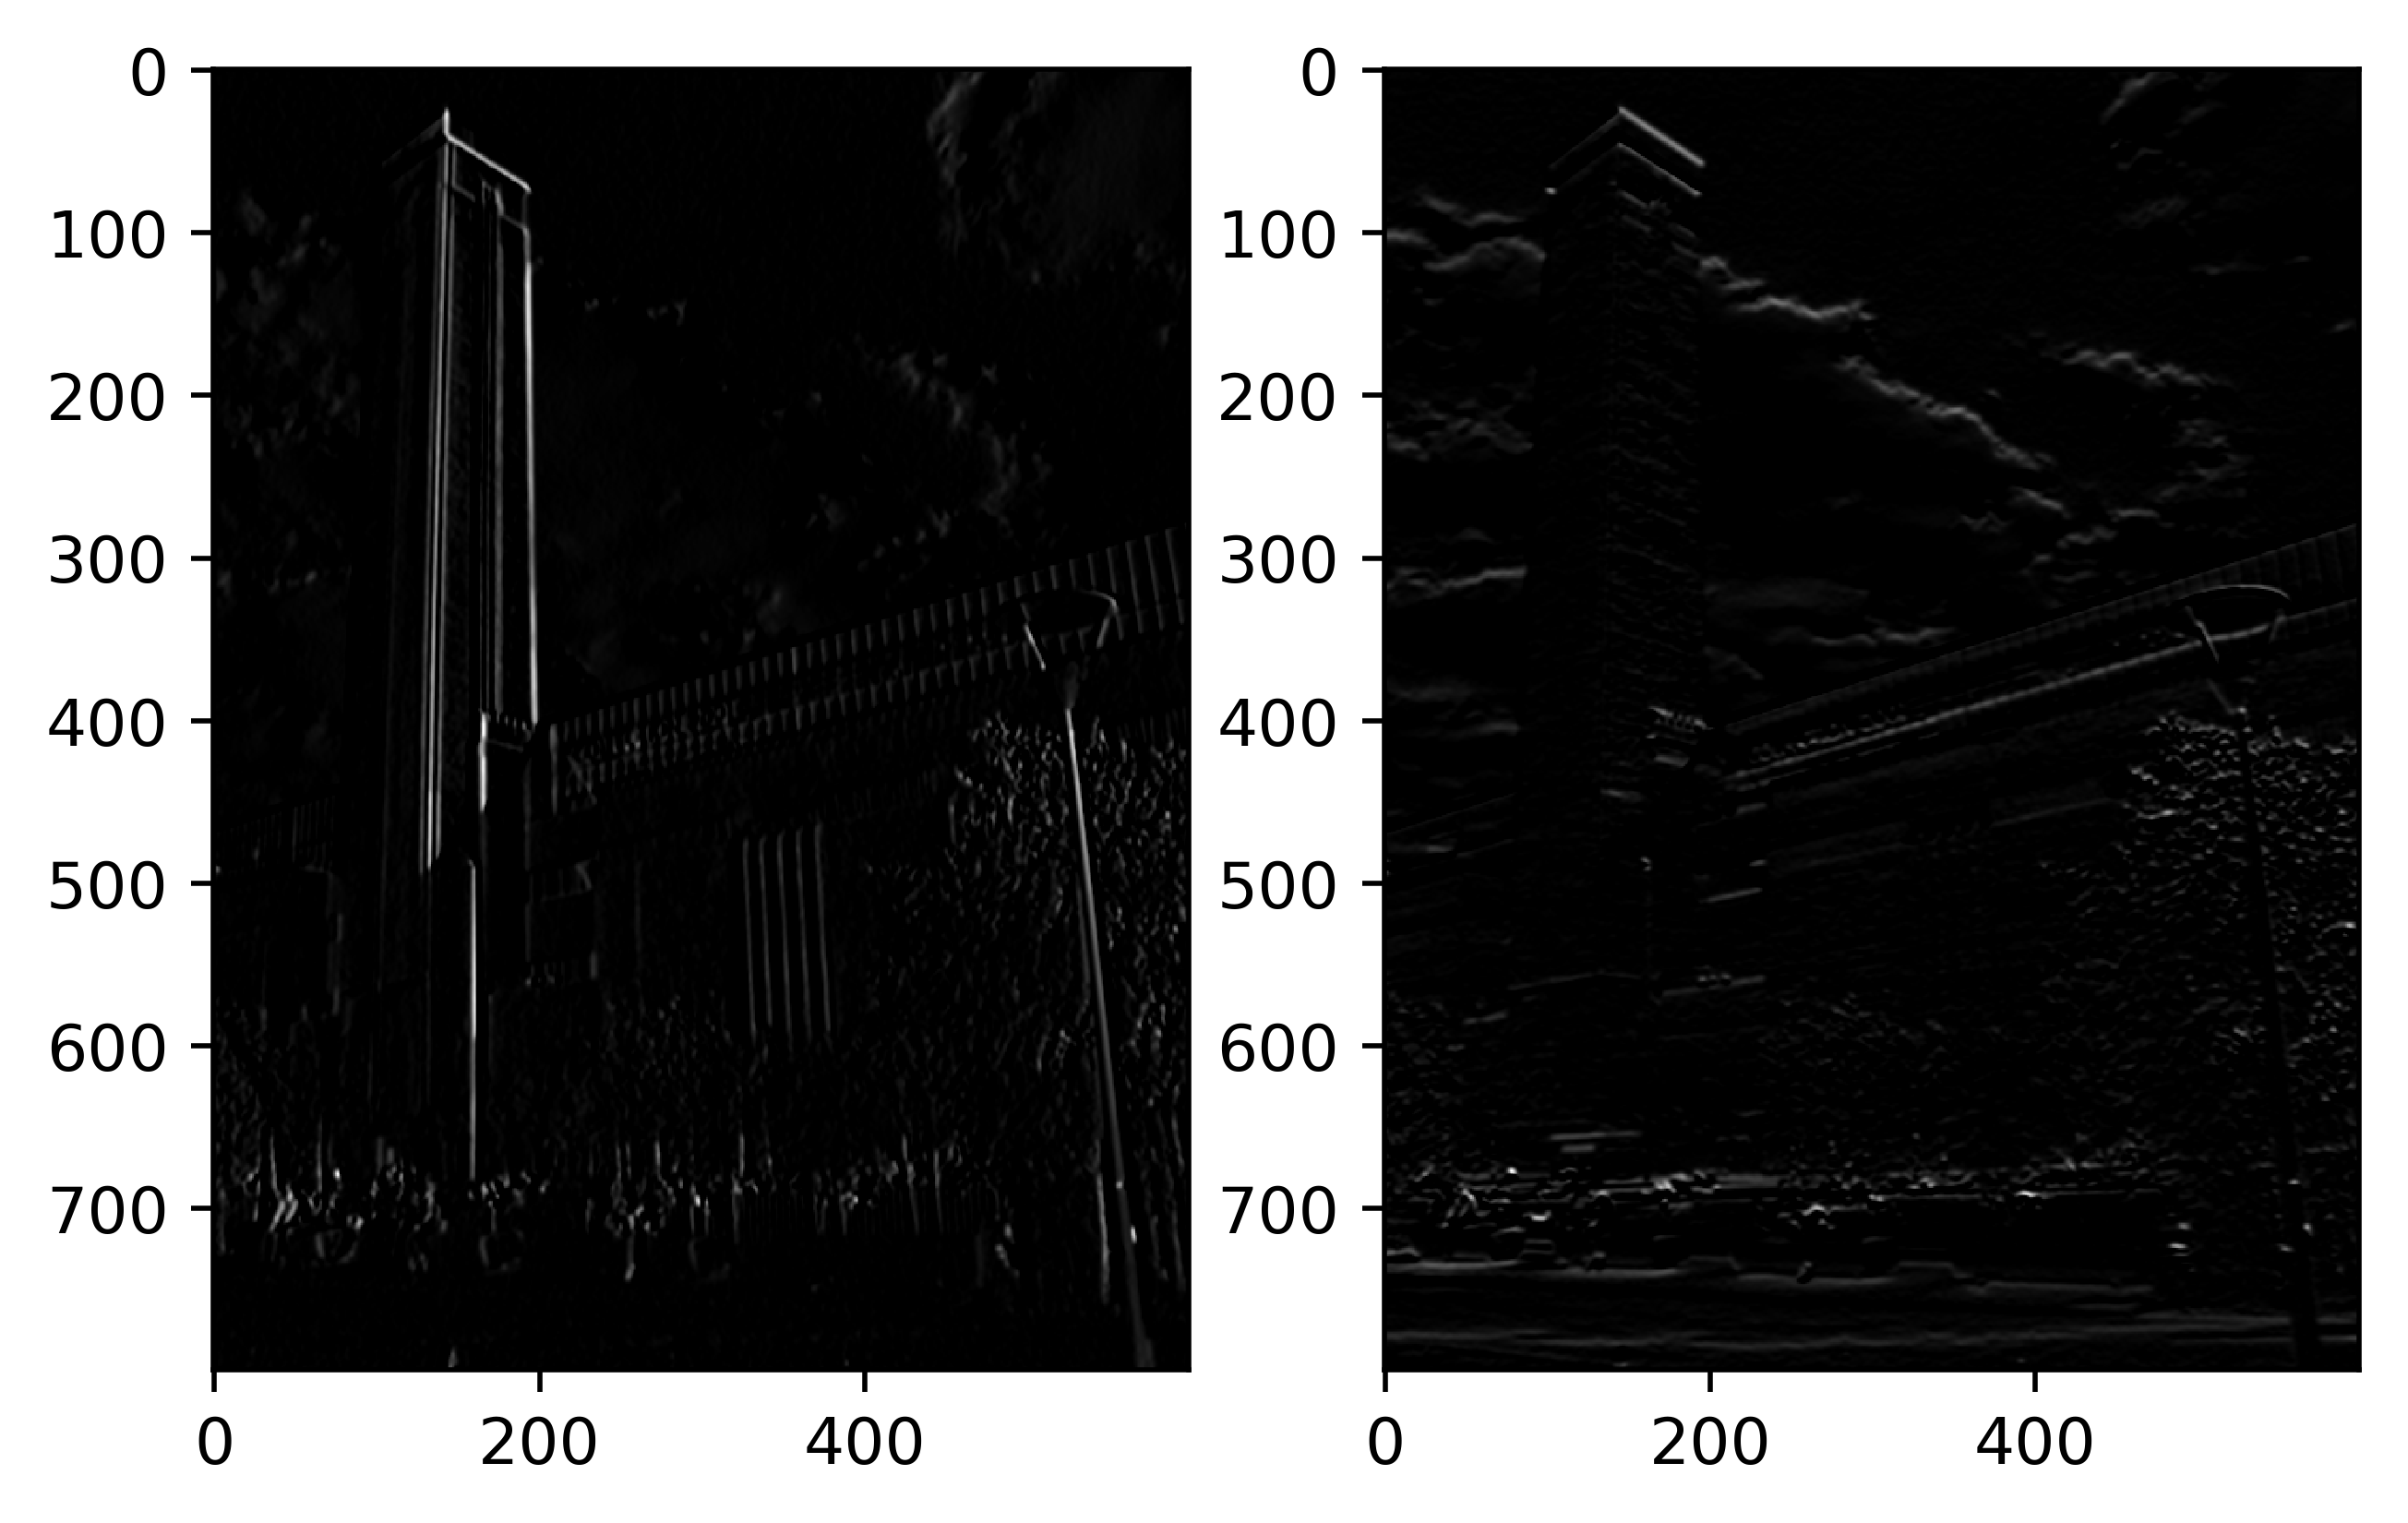

In [41]:
#blur1, 5x5 gaussian
img_gray_blurred = cv2.GaussianBlur(img_gray, (5, 5), 0)

#sobel (derivatives in x & y, d/dx, d/dy)
sobelx = cv2.Sobel(img_gray_blurred, cv2.CV_16U,1,0,ksize=5)  # d/dx
sobely = cv2.Sobel(img_gray_blurred, cv2.CV_16U,0,1,ksize=5)  # d/dy

plt.subplot(1, 2, 1)
plt.imshow(sobelx, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(sobely, cmap='gray')
plt.show()

Stellen Sie dar Resultat der Ableitungen dar (wie?) und berechnen Sie auch die Kantenstärke als 

$$ \text{edge} = \sqrt{dx^2 + dy^2} $$

und stellen Sie diese dar.


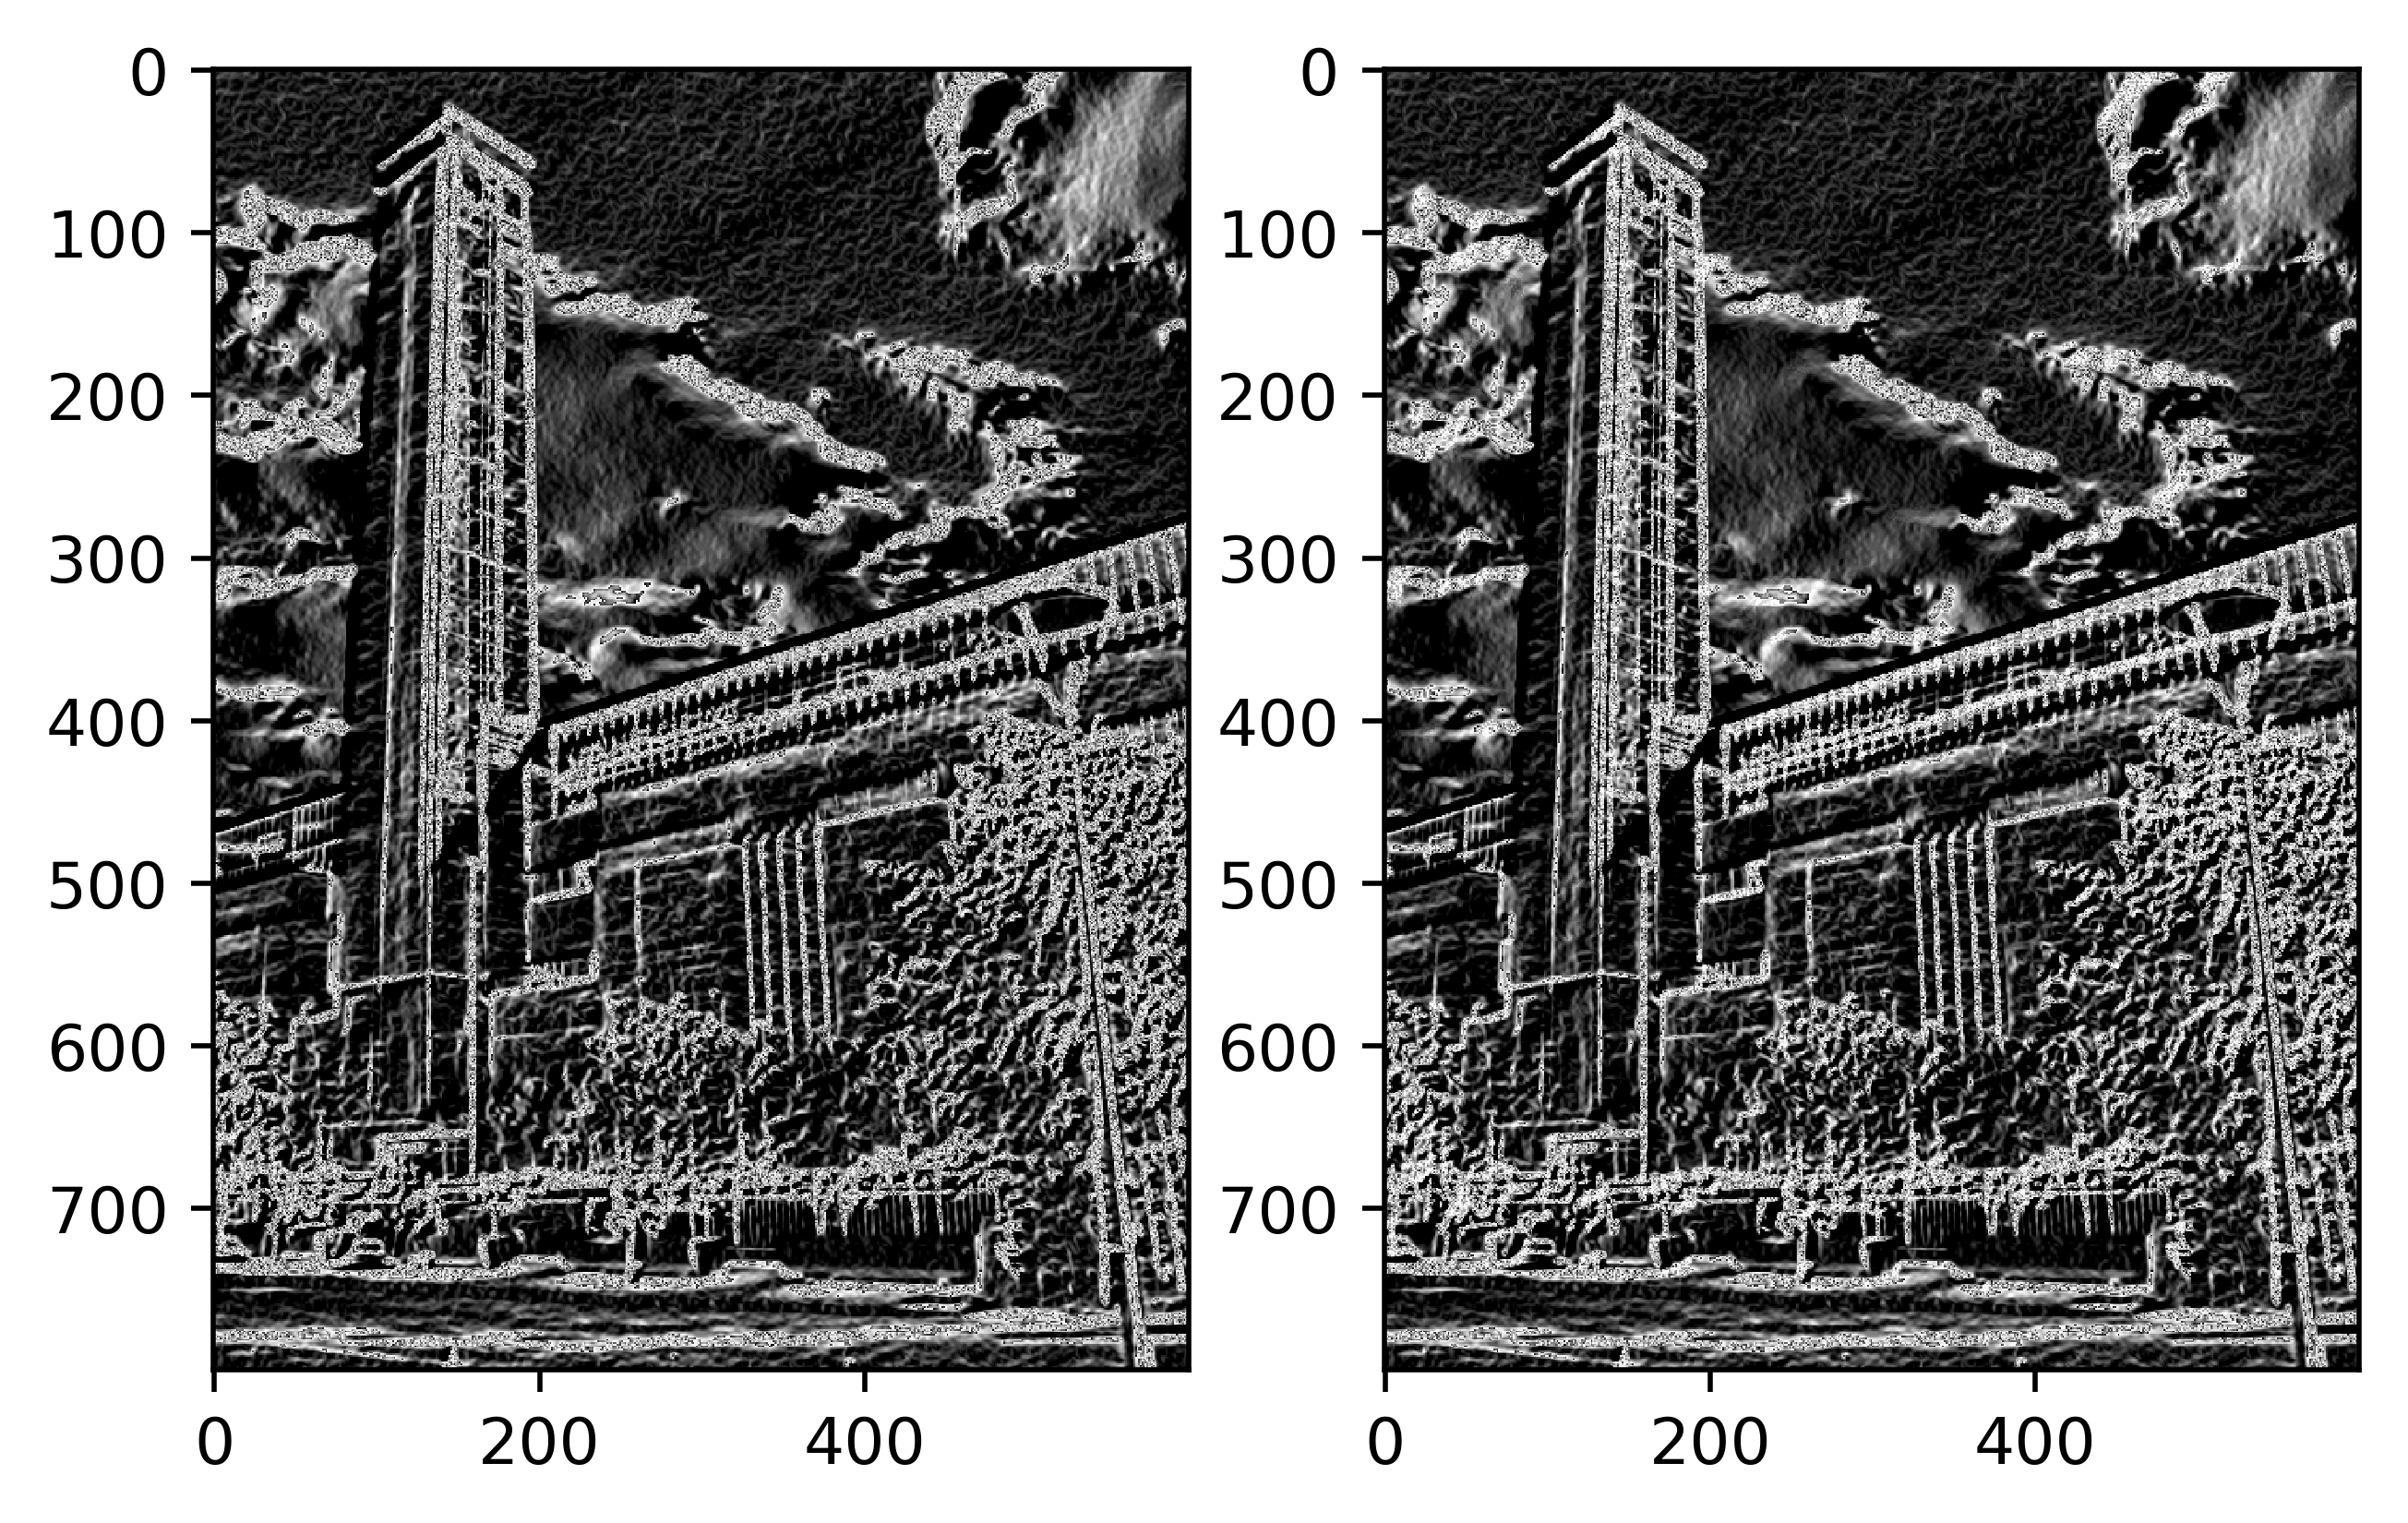

In [37]:
#edges 1 & 2
edge1 = np.sqrt(np.add(np.square(sobelx), np.square(sobely))) # square root of sum of squares of derivatives
edge2 = np.sqrt(cv2.bitwise_or(np.square(sobelx), np.square(sobely)))

plt.subplot(1, 2, 1)
plt.imshow(edge1, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(edge2, cmap='gray')
plt.show()

#same result (np.add == cv2.bitwise_or)

Wenden Sie nun nochmals Canny an, aber geben Sie dabei die bereits definierten Ableitungen mit.

Experimentieren Sie mit verschiedenen Werten für das Sigma beim GaussianBlur. Wie wirkt sich der Parameter auf die Kanten aus?

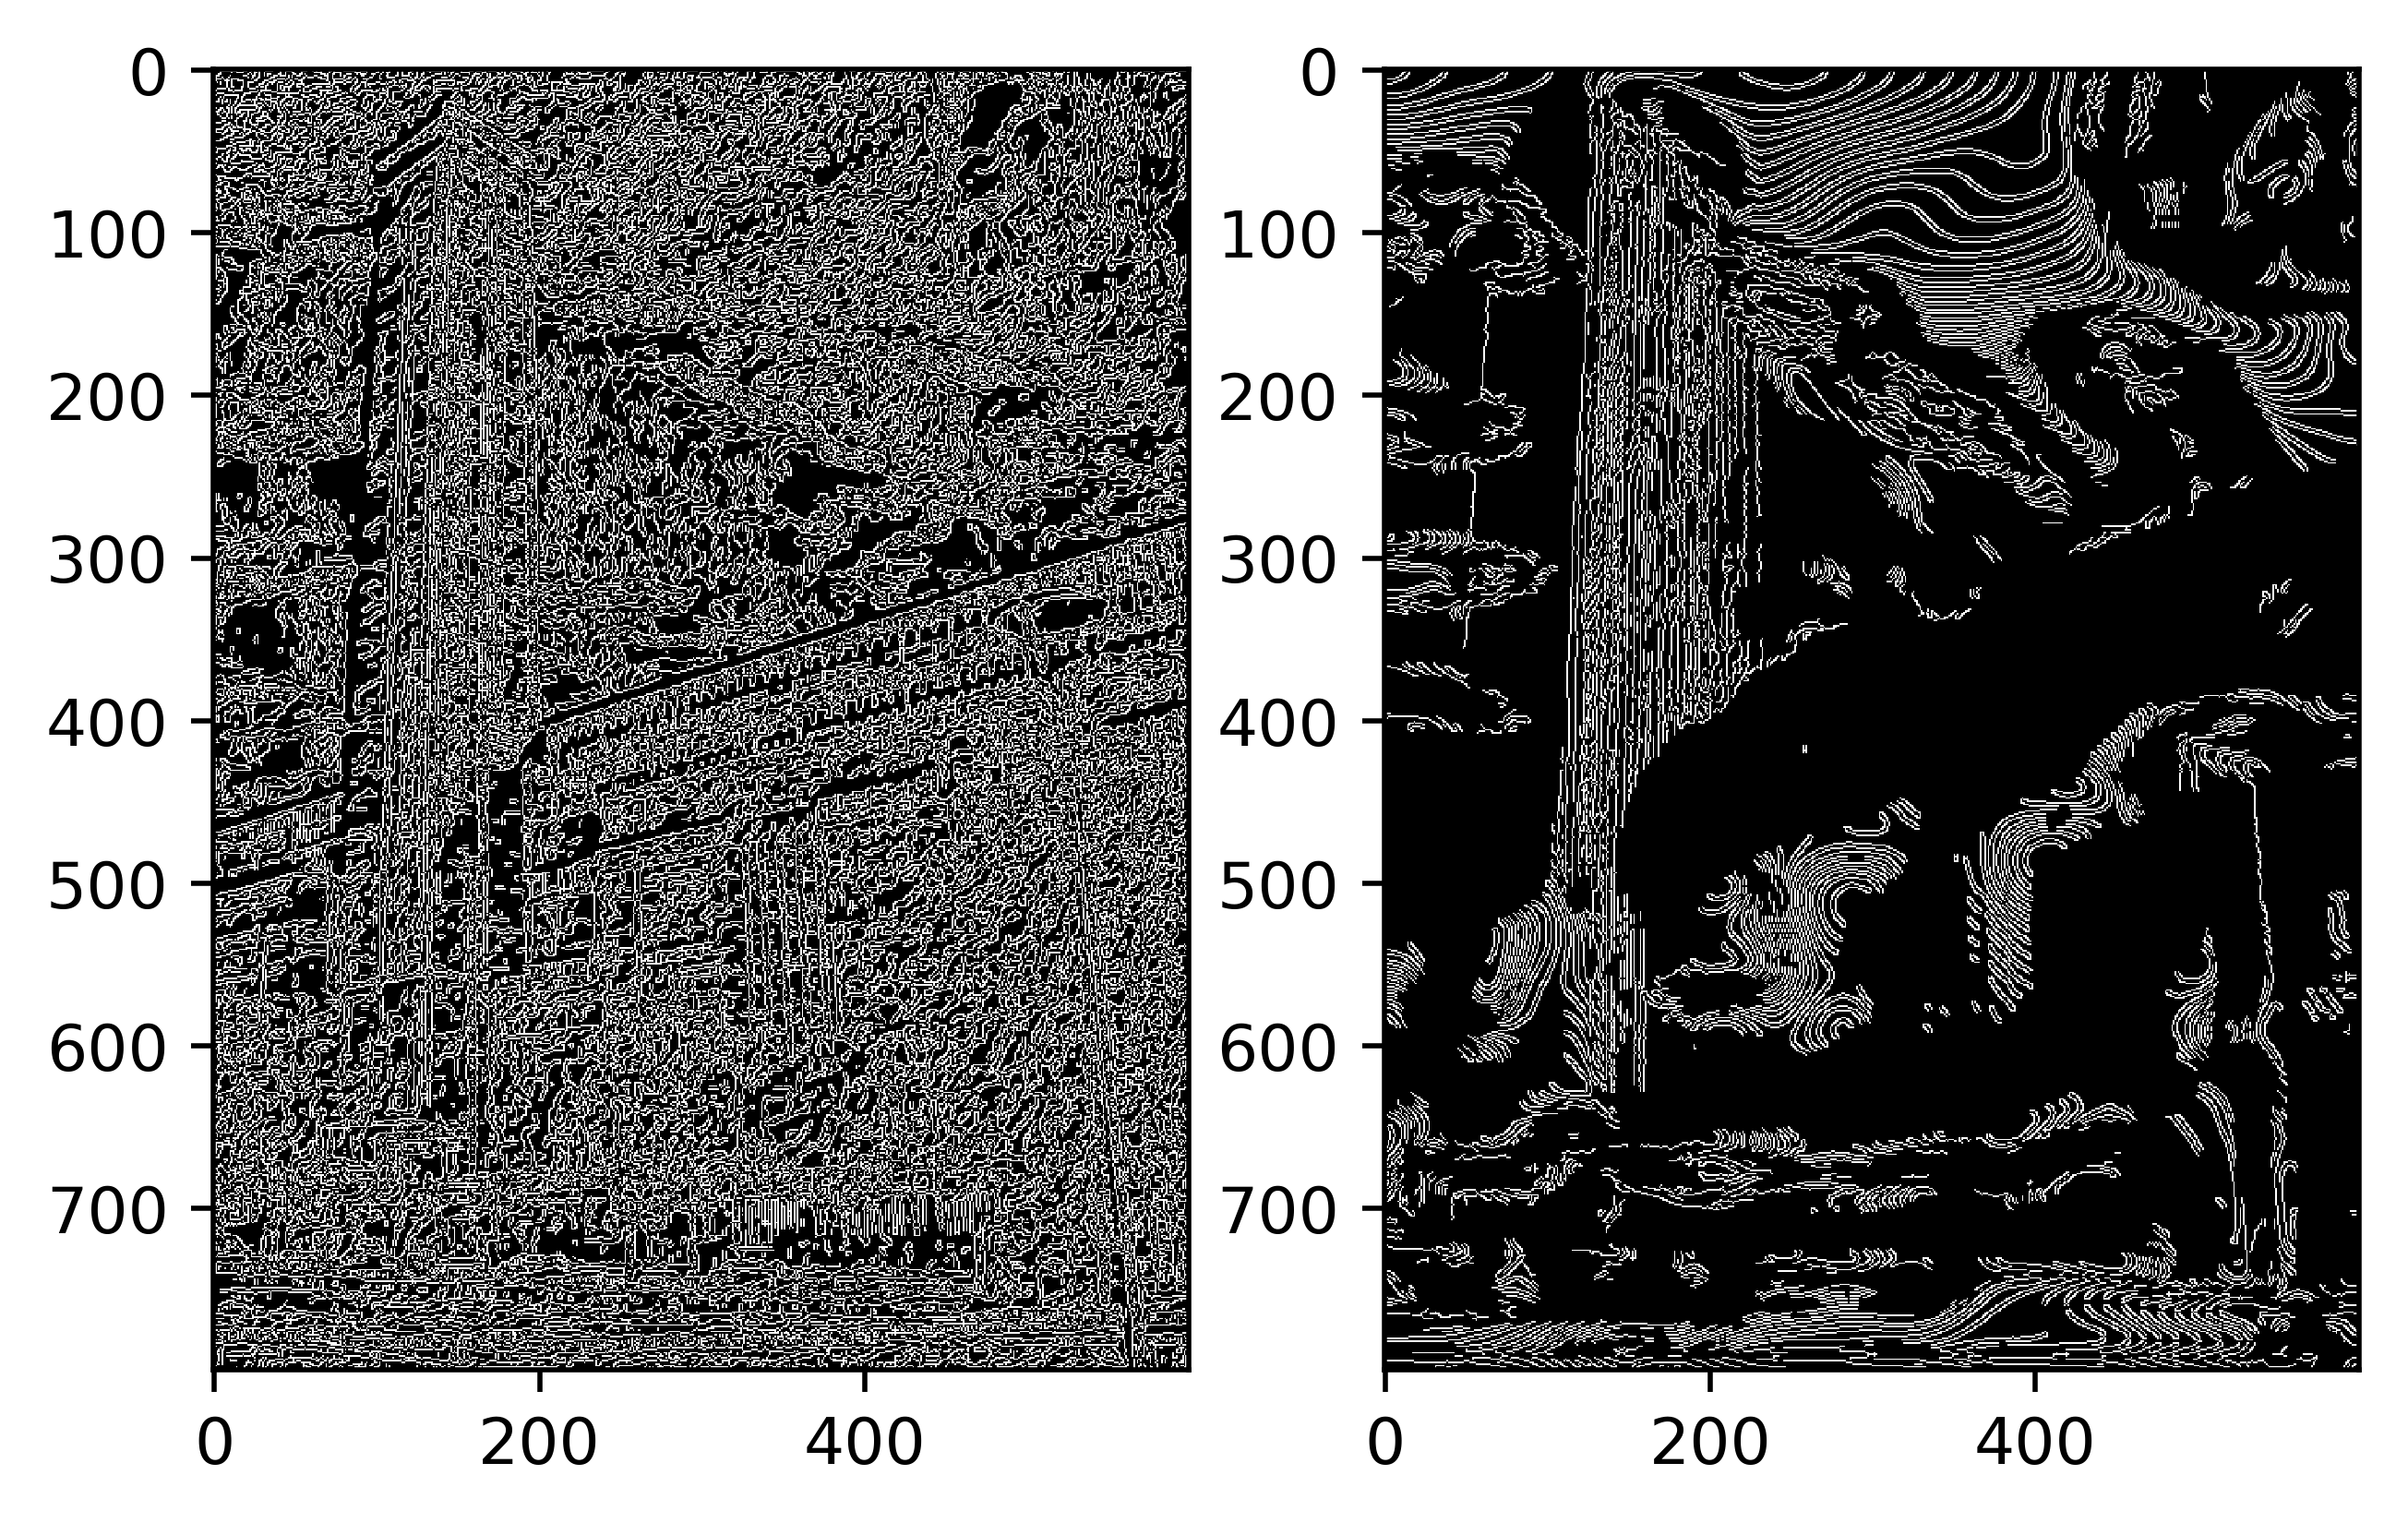

In [48]:
#blur2, 99x99 gaussian
img_gray_blurred2 = cv2.GaussianBlur(img_gray, (99, 99), 0)
#blurring senkt die Anzahl Kanten

#sobel2 (derivatives in x & y, d/dx, d/dy)
sobelx2 = cv2.Sobel(img_gray_blurred2, cv2.CV_16U,1,0,ksize=5)  # d/dx
sobely2 = cv2.Sobel(img_gray_blurred2, cv2.CV_16U,0,1,ksize=5)  # d/dy

#edges3
edge3 = np.sqrt(np.add(np.square(sobelx2), np.square(sobely2)))

#workaround
edge1_copy = np.uint8(edge1)
edge3_copy = np.uint8(edge3)

canny3 = cv2.Canny(edge1_copy, 80, 160)
canny4 = cv2.Canny(edge3_copy, 80, 160)

plt.subplot(1, 2, 1)
plt.imshow(canny3, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(canny4, cmap='gray')
plt.show()

## Hough Transformation

Die Hough Transformation wird verwendet um Geraden in einem Bild zu erkennen.

Verwenden Sie die Function HoughLines um im Kantenbild die Geraden zu finden.

In [125]:
img_gray_hough = img_gray
#convert to rgb (for line printing in color)
img_gray_hough = cv2.cvtColor(img_gray_hough, cv2.COLOR_GRAY2RGB)
#blur
img_gray_hough_blurred = cv2.GaussianBlur(img_gray_hough, (9, 9), 0)
#canny
canny5 = cv2.Canny(img_gray_hough_blurred, 30, 90, 3)
#hough
lines = cv2.HoughLines(canny5, 1, np.pi / 180, 63, None, 0, 0)

Stellen Sie die gefundenen Geraden nun auf dem Bild dar. Dazu können sie cv2.line verwenden um sie in ein Bild zu zeichnen. Zuvor müssen Sie aber die Parameter von Polar- auf Kartesische-Koordinaten umrechnen...

number of lines: 129


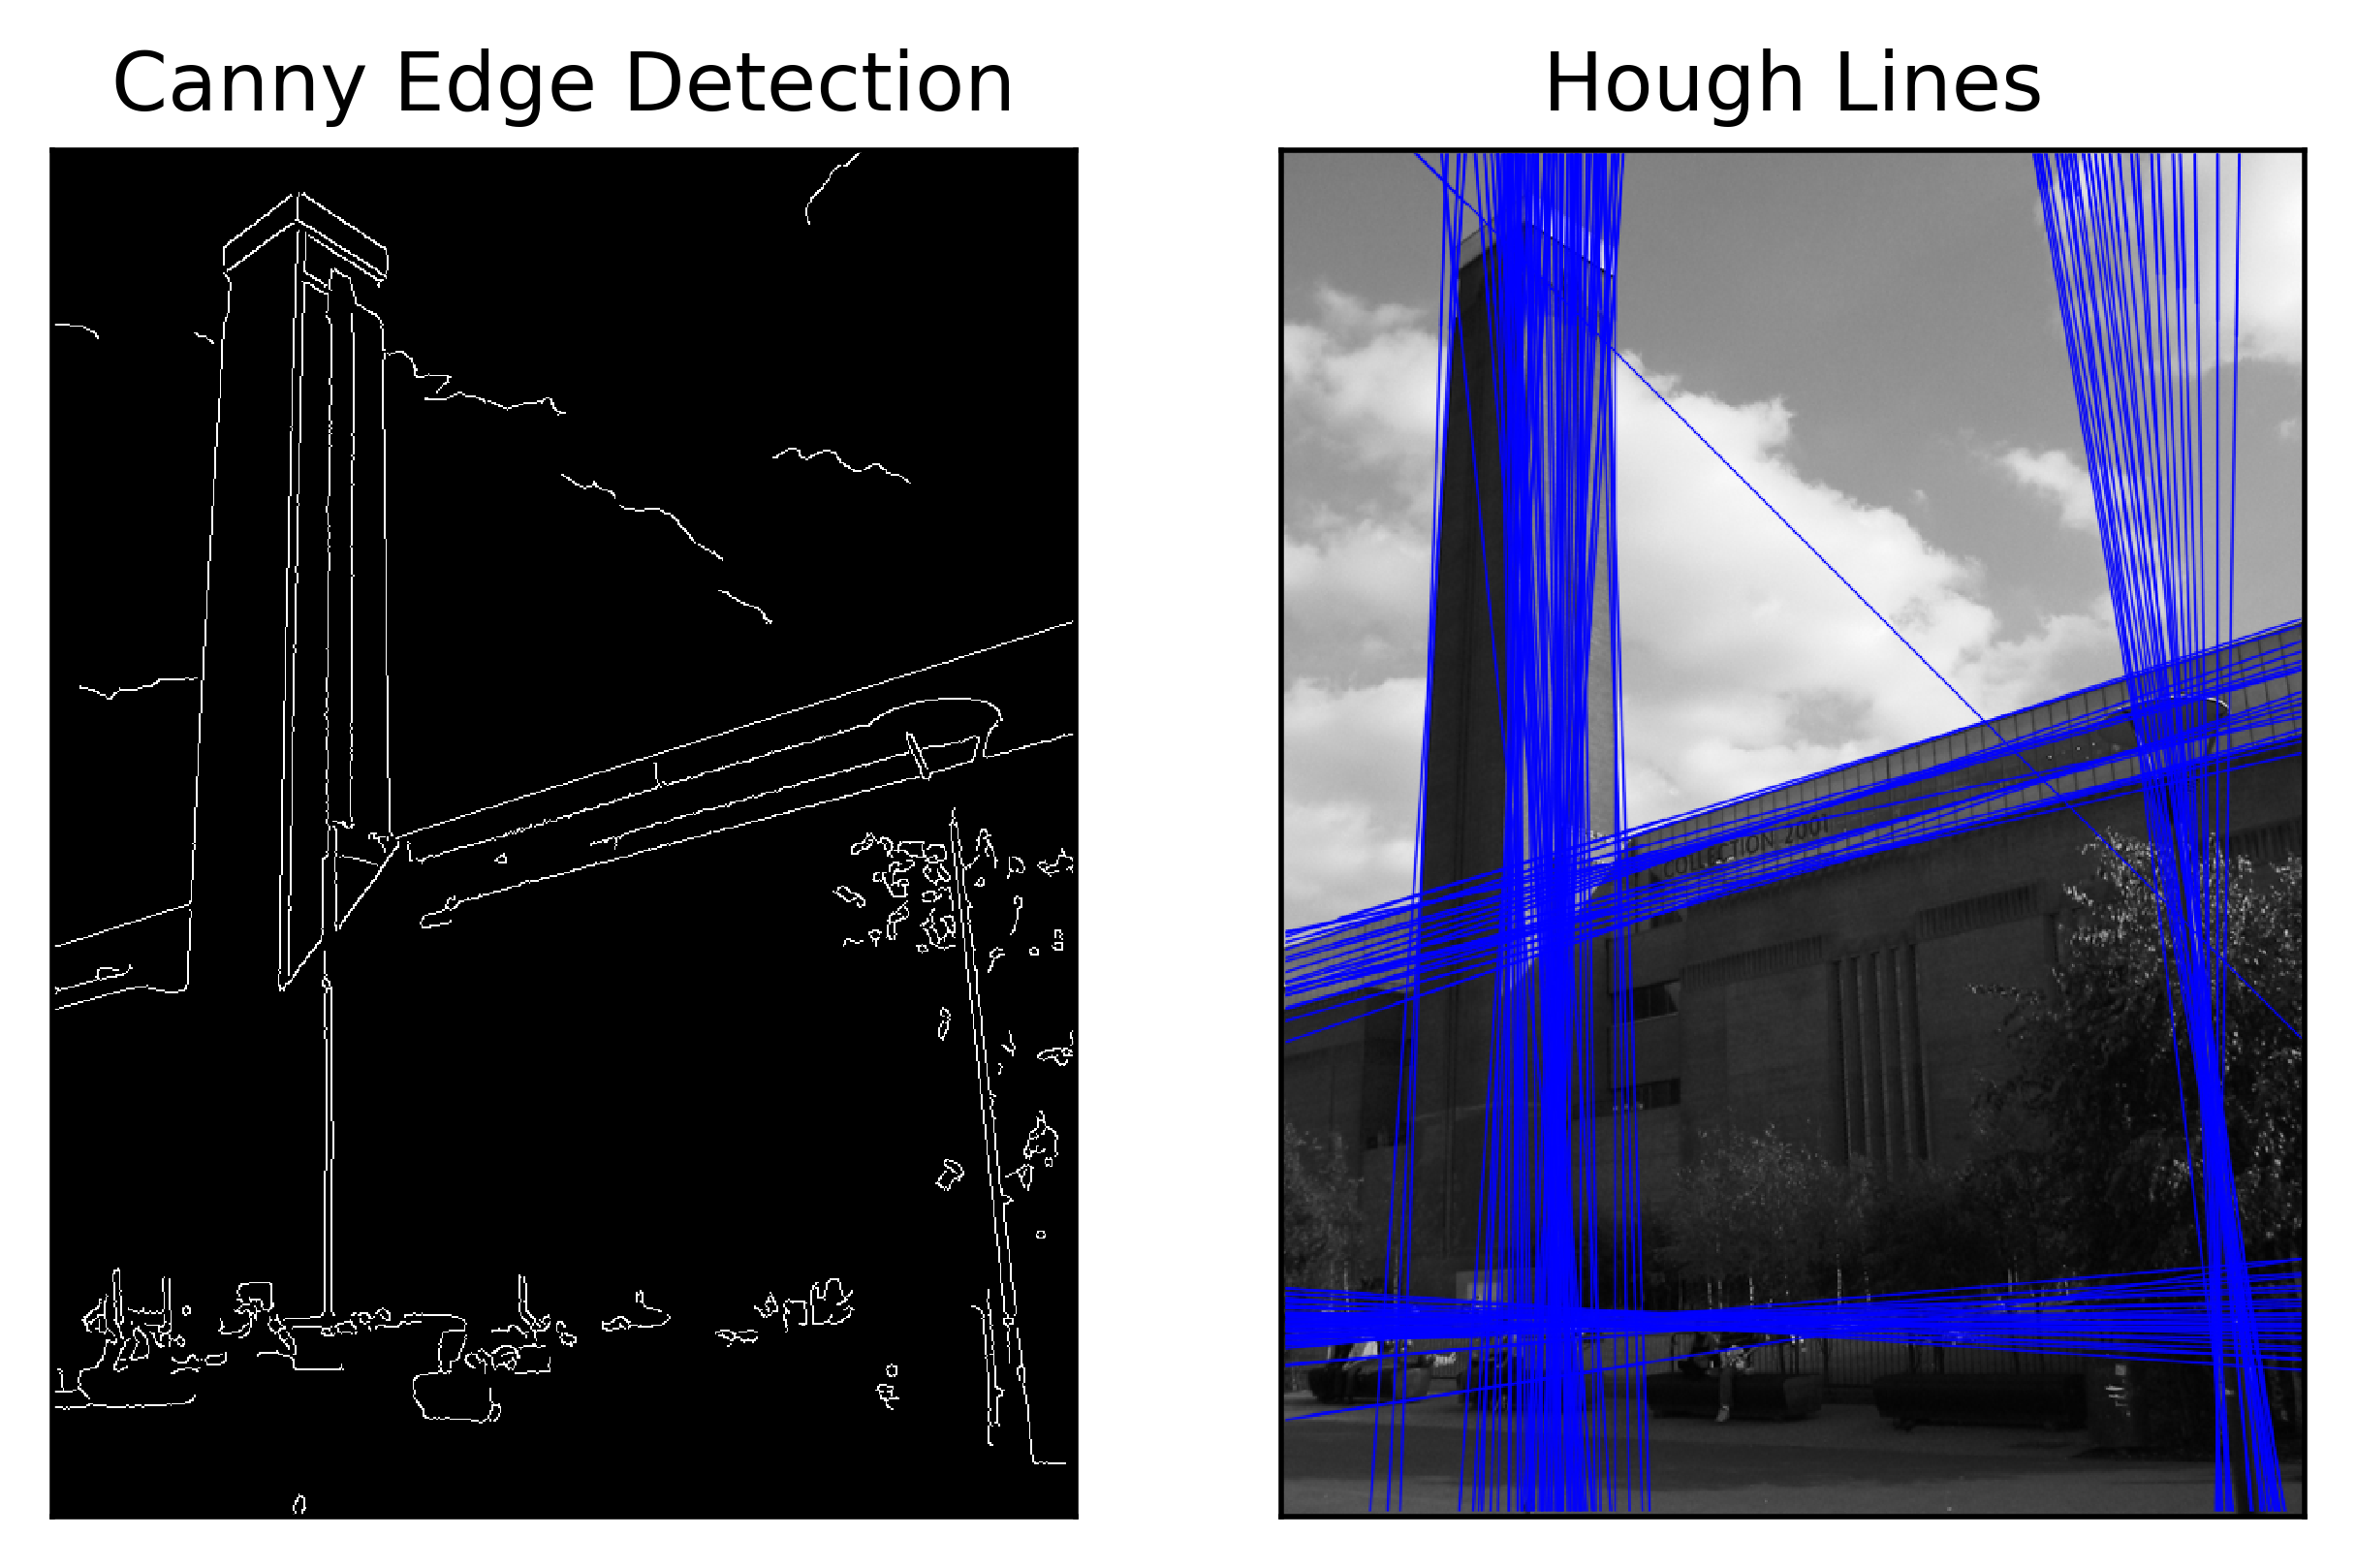

In [127]:
#import
import math

numLines = 0
# Draw the lines
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(img_gray_hough, pt1, pt2, (0,0,255), 1, cv2.LINE_AA)
        numLines += 1

print("number of lines: " + str(numLines))
plt.subplot(1, 2, 1)
plt.imshow(canny5, cmap = 'gray')
plt.title('Canny Edge Detection'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(img_gray_hough)
plt.title('Hough Lines'), plt.xticks([]), plt.yticks([])

plt.show()